# Introduction

The dataset I choose is Zomato

The Zomato dataset provides detailed information about restaurants, including their ratings, cuisines, delivery options, and locations

The questions about this dataset:

    1.Highest Rated Restaurant in Singapore

    2.Lowest Rated Restaurant in Singapore

    3.Cuisines ordered most

    4.Cuisines ordered least
    
    5.City with Online Delivery in Each Country

    6.Ratings Range based in Country

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("zomato.csv")
df.head(5)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
df.shape

(9551, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [18]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [19]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

### Data Cleaning

In [68]:
# drop unuseful columns 
df.drop(['Address','Locality Verbose', 'Locality'],axis=1,inplace=True) 

In [69]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [21]:
df['Cuisines'].fillna('missing',inplace=True )

In [22]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [23]:
df.duplicated().sum()

0

### Join

In [24]:
df1= pd.read_excel("Zomato_Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [25]:
df2= pd.merge(df,df1, on="Country Code", how="left")
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [26]:
df2['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

### Rating

In [27]:
df2['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [28]:
df2['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [29]:
df2['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [30]:
ratings= df2.groupby(['Aggregate rating','Rating text','Rating color']).size().reset_index().rename(columns= {0:'Rating_counts'})
ratings

,Aggregate rating,Rating text,Rating color,Rating_counts
0,0.0,Not rated,White,2148
1,1.8,Poor,Red,1
2,1.9,Poor,Red,2
3,2.0,Poor,Red,7
4,2.1,Poor,Red,15
5,2.2,Poor,Red,27
6,2.3,Poor,Red,47
7,2.4,Poor,Red,87
8,2.5,Average,Orange,110
9,2.6,Average,Orange,191


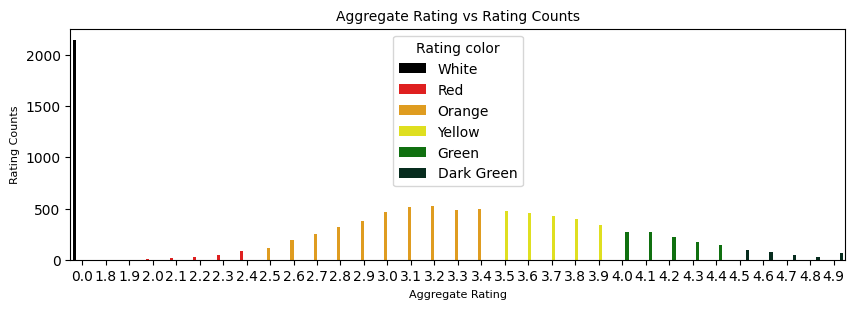

In [31]:
plt.rcParams['figure.figsize']=(10,3) 
sns.barplot(x='Aggregate rating', y='Rating_counts',  hue='Rating color',  palette=['black', 'red', 'orange', 'yellow', 'green', '#013220'],  data=ratings)

plt.title('Aggregate Rating vs Rating Counts', fontsize=10)
plt.xlabel('Aggregate Rating', fontsize=8)
plt.ylabel('Rating Counts', fontsize=8)
plt.show()

# Exploration with Visuals and Conclusions

#### Question1 : In Singapore which restrautant got high rating 

In [32]:
singapore_restaurants = df2[df2['City'] == 'Singapore']

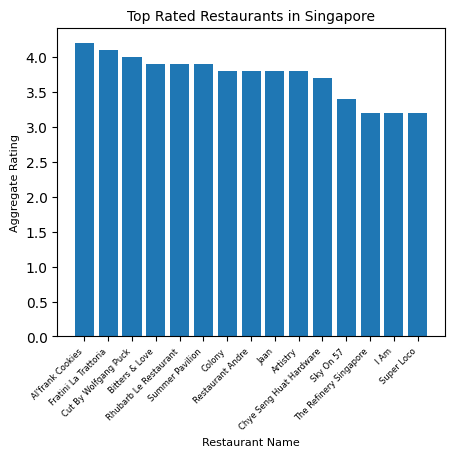

In [82]:
top_rated_singapore = singapore_restaurants.sort_values(by='Aggregate rating', ascending=False).head(15)
plt.figure(figsize=(5, 4))
plt.bar(top_rated_singapore['Restaurant Name'], top_rated_singapore['Aggregate rating'])
plt.xlabel('Restaurant Name', fontsize=8)
plt.ylabel('Aggregate Rating', fontsize=8)
plt.title('Top Rated Restaurants in Singapore', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()



#### Question2 : In Singapore which restrautant got least rating 

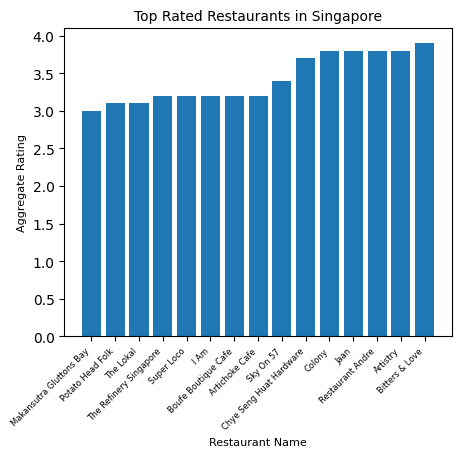

In [83]:
least_rated_singapore = singapore_restaurants.sort_values(by='Aggregate rating').head(15)
plt.figure(figsize=(5,4))
plt.bar(least_rated_singapore['Restaurant Name'], least_rated_singapore['Aggregate rating'])
plt.xlabel('Restaurant Name', fontsize=8)
plt.ylabel('Aggregate Rating', fontsize=8)
plt.title('Top Rated Restaurants in Singapore', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()


#### Question3 : Mostly ordered Cuisines

In [35]:
Cuisines_values = df2["Cuisines"].value_counts().values
Cuisines_values

array([936, 511, 354, ...,   1,   1,   1], dtype=int64)

In [36]:
Cuisines_index = df2["Cuisines"].value_counts().index
Cuisines_index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', name='Cuisines', length=1826)

([<matplotlib.patches.Wedge at 0x1831ce27a00>,
 [Text(0.7624514950536498, 0.7928856901788898, 'North Indian'),
  Text(-0.5065827546470452, 0.9764086811853998, 'North Indian, Chinese'),
  Text(-1.0339491875430904, 0.3754318547739167, 'Chinese'),
  Text(-1.06286447441522, -0.2834062614446936, 'Fast Food'),
  Text(-0.7241090537387509, -0.8280495627035684, 'North Indian, Mughlai'),
  Text(-0.19059887814920093, -1.0833614667544098, 'Cafe'),
  Text(0.2939040269060523, -1.0600096334318885, 'Bakery'),
  Text(0.6457216710461804, -0.8905299116488613, 'North Indian, Mughlai, Chinese'),
  Text(0.890252241854364, -0.6461044388280266, 'Bakery, Desserts'),
  Text(1.031998214639219, -0.38076197943264356, 'Street Food'),
  Text(1.0930265809954232, -0.1236644380469015, 'Pizza, Fast Food')],
 [Text(0.4158826336656271, 0.43248310373393983, '25.62%'),
  Text(-0.27631786617111553, 0.5325865533738544, '13.99%'),
  Text(-0.5639722841144129, 0.20478101169486365, '9.69%'),
  Text(-0.5797442587719381, -0.1545852

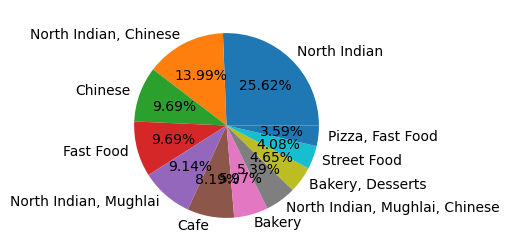

In [49]:
plt.pie(Cuisines_values[:11],labels=Cuisines_index[:11],autopct="%.2f%%")

#### Question4 : Least ordered Cuisines

([<matplotlib.patches.Wedge at 0x1831cf7c430>,
 [Text(1.0461621663333946, 0.3399186987098808, 'Cafe, Pizza, Burger'),
  Text(0.6465637650236903, 0.8899187028927925, 'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese'),
  Text(-2.5747358111484753e-08, 1.0999999999999999, 'Goan, American, Portuguese'),
  Text(-0.6465638066837905, 0.8899186726249574, 'South Indian, Desserts, Beverages'),
  Text(-1.0461621822461362, 0.3399186497354952, 'Healthy Food, North Indian, Italian, Salad'),
  Text(-1.0461621504206509, -0.33991874768426583, 'Bengali, Fast Food'),
  Text(-0.6465637233635886, -0.8899187331606258, 'North Indian, Rajasthani, Asian'),
  Text(7.724207457870327e-08, -1.0999999999999974, 'Chinese, Thai, Malaysian, Indonesian'),
  Text(0.6465638483438898, -0.88991864235712, 'Bakery, Desserts, North Indian, Bengali, South Indian'),
  Text(1.0461621981588753, -0.33991860076110864, 'Italian, World Cuisine')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.00%'),
  Text(

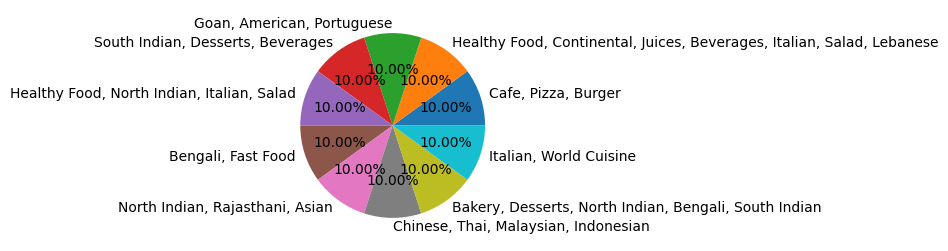

In [46]:
plt.pie(Cuisines_values[-10:],labels=Cuisines_index[-10:],autopct="%.2f%%")

#### Question5 : City that have online delivery options

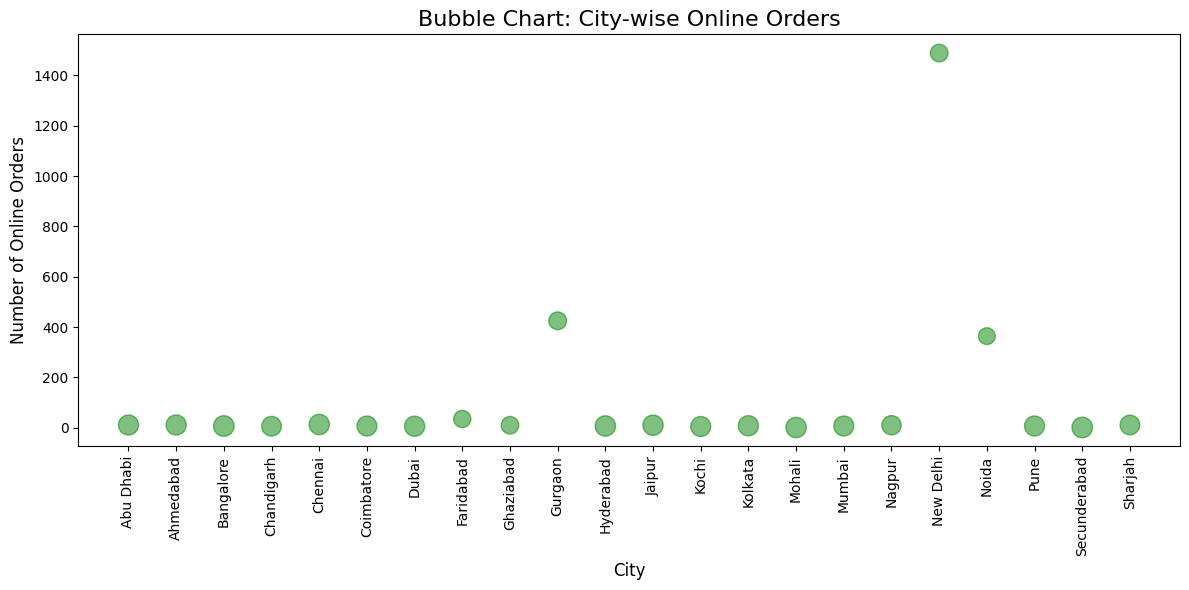

In [79]:
city_data = df2[df2['Has Online delivery'] == 'Yes'].groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean'
}).reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(city_data['City'], city_data['Restaurant ID'], 
            s=city_data['Aggregate rating'] * 50, alpha=0.5, color='green')
plt.title('Bubble Chart: City-wise Online Orders', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Online Orders', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


#### Question6 : Rating based on Country

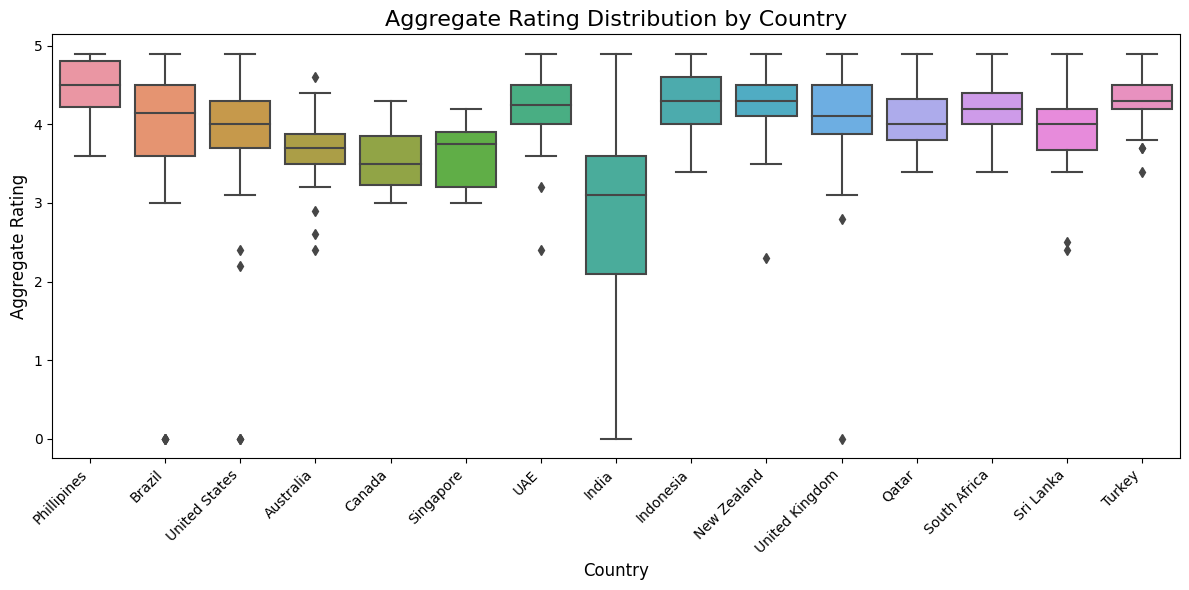

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Aggregate rating', data=df2)
plt.title('Aggregate Rating Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

